In [46]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [47]:
import numpy as np
import pickle
import operator
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D



import tensorflow as tf
import keras
import os 
import time
#import cv2
import numpy as np
#import matplotlib.pyplot as plt
from keras import optimizers
import keras
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.models import Sequential
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
#import matplotlib.pyplot as plt
#from tqdm import tqdm
from keras.utils import np_utils
#from imgaug import augmenters as iaa    
import itertools
%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
#from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
#from classification_models.keras import Classifiers
# GPU test
from tensorflow.python.client import device_lib
np.random.seed(42)
from keras.models import load_model
# Print version
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import os, sys
import scipy.misc
from glob import glob
import numpy as np
import random 
import shutil 
import keras
import time
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.applications.densenet import DenseNet121
from keras.models import load_model
#from keras.optimizers import Adam
from keras import optimizers
import pickle
import sys
import cv2

import tensorflow as tf


np.random.seed(1)

In [48]:
DIRECTORY = r'D:\Leuk Dataset\new fol\train'
VAL_DIRECTORY = r'D:\Leuk Dataset\new fol\val'

CATEGORIES = ['all', 'hem']

In [49]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

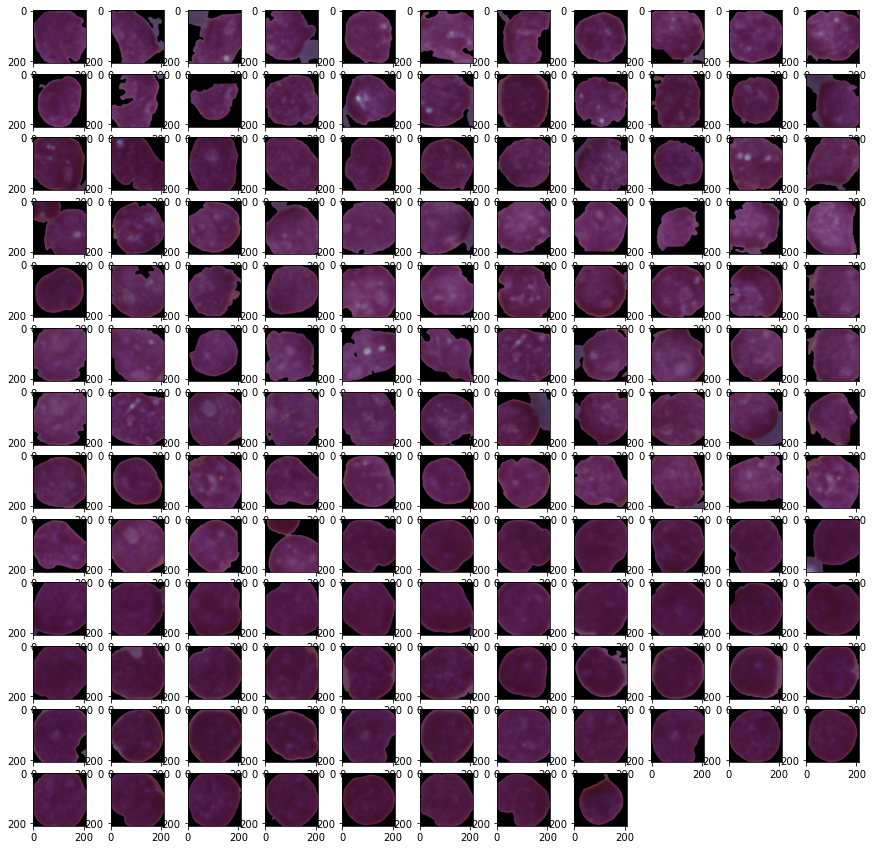

In [50]:
data = []
i = 0
plt.figure(figsize=(15, 15))
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path)
        crop_arr = crop_center(arr, (210,210))
        if 1 <= i+1 <= 140:                      # total 140 image
            ax = plt.subplot(13, 11, i+1)
        plt.imshow(crop_arr)
        i += 1
        data.append([crop_arr, label])

In [51]:
random.shuffle(data)

x_train = []
y_train = []

for features, label in data:
    x_train.append(features)
    y_train.append(label)

    
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)

np.save("x_train_leuknet",x_train)
np.save("y_train_leuknet",y_train)

(10661, 210, 210, 3)


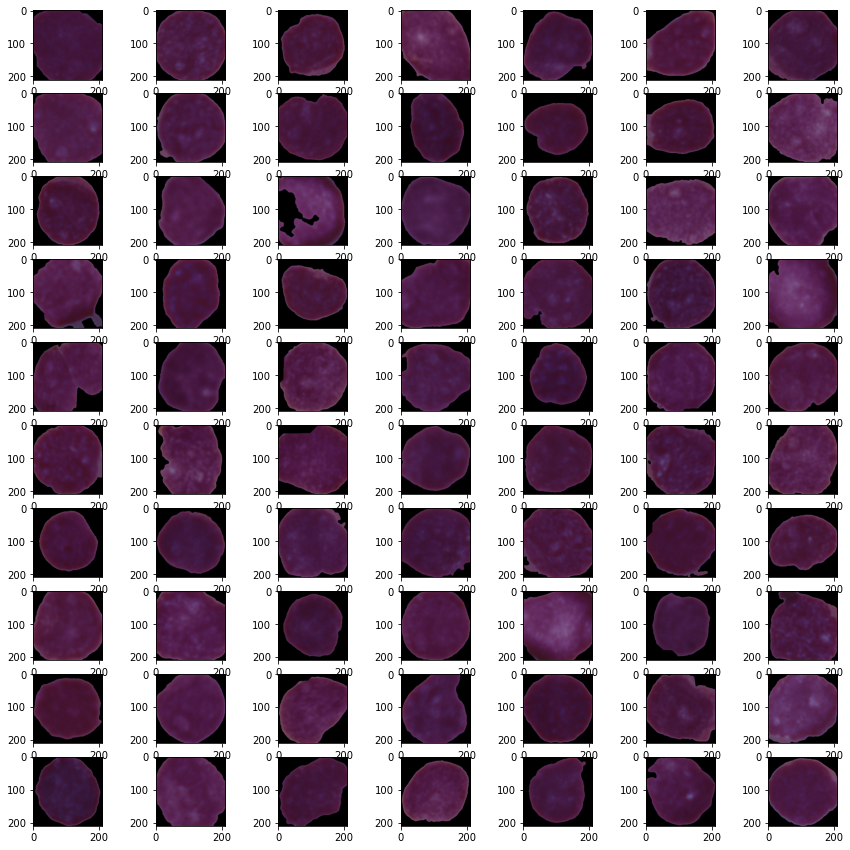

In [52]:
val_data = []
i = 0
plt.figure(figsize=(15, 15))
for category in CATEGORIES:
    path = os.path.join(VAL_DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path)
        crop_arr = crop_center(arr, (210,210))
        if 1 <= i+1 <= 70:                     # total image 70
            ax = plt.subplot(10, 7, i+1)
        plt.imshow(crop_arr)
        i += 1
        val_data.append([crop_arr, label])

In [53]:
random.shuffle(val_data)

x_val = []
y_val = []

for features, label in val_data:
    x_val.append(features)
    y_val.append(label)

    
x_val = np.array(x_val)
y_val = np.array(y_val)

In [54]:
from tensorflow.keras.applications.resnet50 import ResNet50



from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import keras
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau


# load model without classifier layers
model = ResNet50(include_top=False, input_shape=(210, 210, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
#class1 = Dense(1024, activation='relu')(flat1)
#class2 = Dense(1024, activation='relu')(class1)
output = Dense(1, activation='sigmoid')(flat1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
'''
def build_resnet50_unet(input_shape):

    """ Input """
    inputs = Input(input_shape)
    s = Lambda(lambda x: x/255) (inputs)

    """ Pre-trained VGG16 Model """
    resnet50 = ResNet50(include_top=True, weights=None, input_tensor=s, input_shape=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid")
    
    return resnet50

     

if __name__ == "__main__":
    input_shape = (210, 210, 3)
    model = build_resnet50_unet(input_shape)
    model.summary()
'''

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 210, 210, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 216, 216, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 105, 105, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 105, 105, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

'\ndef build_resnet50_unet(input_shape):\n\n    """ Input """\n    inputs = Input(input_shape)\n    s = Lambda(lambda x: x/255) (inputs)\n\n    """ Pre-trained VGG16 Model """\n    resnet50 = ResNet50(include_top=True, weights=None, input_tensor=s, input_shape=None,\n    pooling=None,\n    classes=1,\n    classifier_activation="sigmoid")\n    \n    return resnet50\n\n     \n\nif __name__ == "__main__":\n    input_shape = (210, 210, 3)\n    model = build_resnet50_unet(input_shape)\n    model.summary()\n'

In [55]:
#import tensorflow as tf
from keras.optimizers import Adam, RMSprop, SGD
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
#sgd_opt = SGD(learning_rate=1e-06, momentum=0.0, decay=0.0, nesterov=False)
#rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
# eve_opt = Eve(lr=1e-4, decay=1E-4, beta_1=0.9, beta_2=0.999, beta_3=0.999, small_k=0.1, big_K=10, epsilon=1e-08)

model.compile(optimizer= adam_opt,
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [56]:
import tensorflow.keras as keras
callbacks = [
    keras.callbacks.ModelCheckpoint('weighted_baseline_ResNet50.h5', monitor='val_acc', save_best_only=True, mode='max'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.1, verbose=1, patience=5, mode='max')]


In [57]:
print(x_train.shape)
print(x_val.shape)
'''
x_train = x_train.astype('float32')
x_val   = x_val.astype('float32')
print(x_train.dtype)
print(x_val.dtype)
x_train = np.resize(x_train, (x_train.shape[0], 32, 32, 3))
x_val = np.resize(x_val, (x_val.shape[0], 32, 32, 3))
print(x_train.shape)
print(x_val.shape)
'''

(10661, 210, 210, 3)
(1867, 210, 210, 3)


"\nx_train = x_train.astype('float32')\nx_val   = x_val.astype('float32')\nprint(x_train.dtype)\nprint(x_val.dtype)\nx_train = np.resize(x_train, (x_train.shape[0], 32, 32, 3))\nx_val = np.resize(x_val, (x_val.shape[0], 32, 32, 3))\nprint(x_train.shape)\nprint(x_val.shape)\n"

In [58]:
import math
BATCH_SIZE=32

TRAINING_SIZE = x_train.shape[0]

VALIDATION_SIZE = x_val.shape[0]

compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
train_steps_per_epoch = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)
print(train_steps_per_epoch, val_steps)

334 59


In [59]:
from keras.preprocessing.image import ImageDataGenerator
dataAugmentaion = ImageDataGenerator()

In [60]:
model.fit_generator(dataAugmentaion.flow(x_train, y_train, batch_size = 1),
 validation_data = (x_val,y_val), steps_per_epoch = len(x_train) // 1,
 epochs = 50, class_weight={0:0.73301705, 1:1.57288286})

Epoch 1/50
10661/10661 [==============================] - 464s 44ms/step - loss: 0.5581 - accuracy: 0.7823 - val_loss: 0.9236 - val_accuracy: 0.6952
Epoch 2/50
10661/10661 [==============================] - 465s 44ms/step - loss: 0.2193 - accuracy: 0.9165 - val_loss: 1.4920 - val_accuracy: 0.6899
Epoch 3/50
10661/10661 [==============================] - 464s 44ms/step - loss: 0.0825 - accuracy: 0.9714 - val_loss: 2.0749 - val_accuracy: 0.6899
Epoch 4/50
10661/10661 [==============================] - 463s 43ms/step - loss: 0.0418 - accuracy: 0.9862 - val_loss: 2.4891 - val_accuracy: 0.6856
Epoch 5/50
10661/10661 [==============================] - 462s 43ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 2.4273 - val_accuracy: 0.6760
Epoch 6/50
10661/10661 [==============================] - 462s 43ms/step - loss: 0.0195 - accuracy: 0.9943 - val_loss: 2.7444 - val_accuracy: 0.6818
Epoch 7/50
10661/10661 [==============================] - 462s 43ms/step - loss: 0.0101 - accuracy: 0.9971